In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/AKAM_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,AKAM,71.089996,71.089996,71.489998,69.739998,70.059998,1633700
1,3/4/2019,AKAM,70.290001,70.290001,71.790001,69.709999,71.550003,995000
2,3/5/2019,AKAM,70.550003,70.550003,70.989998,69.800003,70.209999,1282100
3,3/6/2019,AKAM,71.540001,71.540001,71.680000,70.510002,70.620003,1658400
4,3/7/2019,AKAM,70.470001,70.470001,71.150002,70.019997,71.089996,1353400
...,...,...,...,...,...,...,...,...
1319,5/28/2024,AKAM,92.589996,92.589996,94.150002,92.489998,93.540001,1497900
1320,5/29/2024,AKAM,90.839996,90.839996,92.379997,90.779999,92.000000,1332200
1321,5/30/2024,AKAM,90.220001,90.220001,90.889999,89.550003,90.839996,2662200
1322,5/31/2024,AKAM,92.239998,92.239998,92.410004,89.599998,90.120003,3298500


In [3]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3775.940, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3776.888, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3778.814, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3778.804, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3774.981, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3775.053, Time=0.62 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.768 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183]


In [7]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183]


In [8]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183 88.33000183
 88.

In [9]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 16.4766554250472


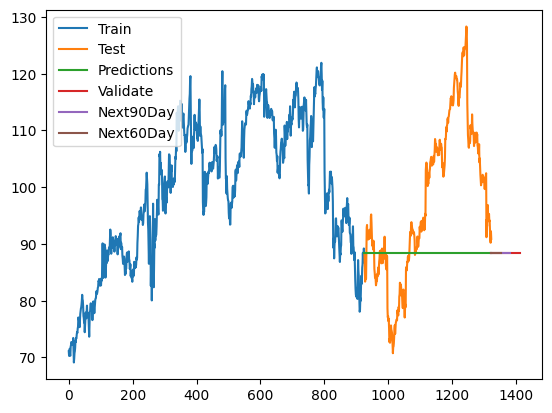

In [10]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.plot(last_data_60,y_next_60_days)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

In [11]:
test_data.index

RangeIndex(start=926, stop=1324, step=1)

In [12]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 16.4766554250472
Testing MAPE: 12.663543081642068
Testing MAE: 13.117185026859294
